In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
path = "/content/drive/My Drive/DL course/HW1/"

# Dataset
https://www.tensorflow.org/api_docs/python/tf/keras/datasets

In [40]:
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

## MNIST
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data

### Loading dataset and Coverting labels to categorical form
https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

In [41]:
(x_train_1, y_train_1), (x_test_1, y_test_1) = datasets.mnist.load_data()
y_train_1 = to_categorical(y_train_1, num_classes=10)
y_test_1 = to_categorical(y_test_1, num_classes=10)

### Train and Test data shapes

In [42]:
print(x_train_1.shape)
print(y_train_1.shape)

(60000, 28, 28)
(60000, 10)


In [43]:
print(x_test_1.shape)
print(y_test_1.shape)

(10000, 28, 28)
(10000, 10)


### Showing one the dataset examples

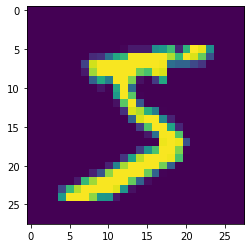

In [44]:
index = 0
fig, (ax1) = plt.subplots(1, 1)
ax1.imshow(x_train_1[index])

## CIFAR-10
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data

### Loading dataset and Coverting labels to categorical form
https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

In [45]:
(x_train_2, y_train_2), (x_test_2, y_test_2) = datasets.cifar10.load_data()
y_train_2 = to_categorical(y_train_2, num_classes=10)
y_test_2 = to_categorical(y_test_2, num_classes=10)

### Train and Test data shapes

In [46]:
print(x_train_2.shape)
print(y_train_2.shape)

(50000, 32, 32, 3)
(50000, 10)


In [47]:
print(x_test_2.shape)
print(y_test_2.shape)

(10000, 32, 32, 3)
(10000, 10)


### Showing one the dataset examples

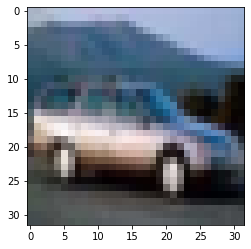

In [48]:
index = 4
fig, (ax1) = plt.subplots(1, 1)
ax1.imshow(x_train_2[index])

## FER-2013
learn more about FER-2013 dataset:
https://www.kaggle.com/datasets/msambare/fer2013

In [14]:
import zipfile

zip_ref = zipfile.ZipFile( path + "archive.zip", 'r')
zip_ref.extractall(path)
zip_ref.close()

In [12]:
# !wget -N -q "https://raw.githubusercontent.com/nikomadol/datasets/main/FER-2013/archive.zip"
# !unzip -n -q archive.zip
train_dir = path + 'train/'
test_dir = path + 'test/'

### Image Data Generator
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Create Image Data Generator for Train and Test sets

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=False,
    validation_split=0.2,
)

test_datagen = ImageDataGenerator(rescale=1./255)

#### Use **.flow_from_directory(directory)** to read Train and Test sets

In [15]:
train_set = train_datagen.flow_from_directory(
    train_dir,
    batch_size=64,
    target_size=(48, 48),
    # shuffle=True,
    color_mode='grayscale',
    class_mode='categorical',
)

test_set = test_datagen.flow_from_directory(
    test_dir,
    batch_size=64,
    target_size=(48, 48),
    # shuffle=True,
    color_mode='grayscale',
    class_mode='categorical',
)

Found 22427 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [16]:
print(train_set)
print(test_set)

# Model
https://www.tensorflow.org/api_docs/python/tf/keras/models

https://www.tensorflow.org/api_docs/python/tf/keras/layers


In [17]:
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

## Sequential
https://www.tensorflow.org/guide/keras/sequential_model

In [18]:
from tensorflow.keras.models import Sequential

In [19]:
model_temp_1 = Sequential()

# Input Layer
# Write your code here
model_temp_1.add(layers.Input(shape=(50, 50)))
model_temp_1.add(layers.Flatten())

# Hidden Layer
# Write your code here
model_temp_1.add(layers.Dense(128))
model_temp_1.add(layers.Activation('relu'))

# Output Layer
# Write your code here
model_temp_1.add(layers.Dense(5))
model_temp_1.add(layers.Activation('softmax'))

### Model Summary
https://www.tensorflow.org/js/guide/models_and_layers#model_summary

In [20]:
model_temp_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2500)              0         
                                                                 
 dense (Dense)               (None, 128)               320128    
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
 activation_1 (Activation)   (None, 5)                 0         
                                                                 
Total params: 320,773
Trainable params: 320,773
Non-trainable params: 0
_________________________________________________________________


### Plotting Model and Save it as **structure_1.png**
https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model 

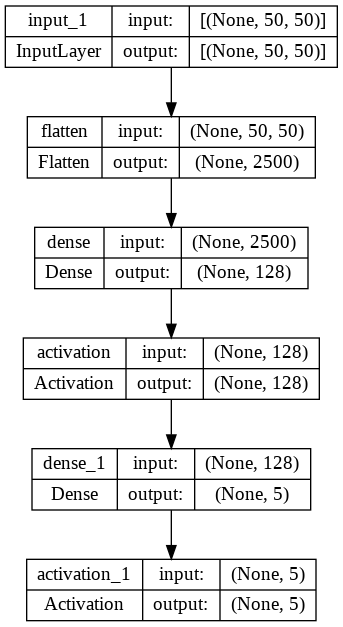

In [21]:
plot_model(
    model_temp_1,
    to_file="structure_1.png",
    show_shapes=True,
    show_layer_names=True,
)

## Functional API 
https://www.tensorflow.org/guide/keras/functional

In [22]:
from tensorflow.keras.models import Model

In [23]:
def model_factory(input_shape, num_classes):
    # Input Layer
    # Write your code here
    input = layers.Input(shape=input_shape)
    x = layers.Flatten()(input)

    # Hidden Layer
    # Write your code here
    x = layers.Dense(128)(x)
    x = layers.Activation('relu')(x)

    # Output Layer
    # Write your code here
    x = layers.Dense(num_classes)(x)
    output = layers.Activation('softmax')(x)

    return Model(inputs=input, outputs=output)

In [24]:
model_template_2 = model_factory(
    input_shape=(50, 50),
    num_classes=5,
)

### Model Summary

In [25]:
model_template_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50, 50)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 2500)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               320128    
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 645       
                                                                 
 activation_3 (Activation)   (None, 5)                 0         
                                                                 
Total params: 320,773
Trainable params: 320,773
Non-trainable

### Plotting Model and Save it as **structure_2.png**

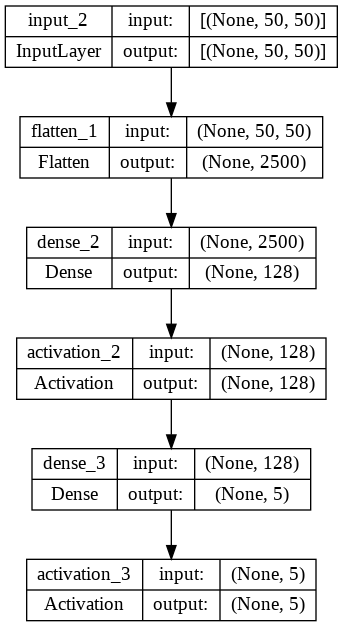

In [26]:
plot_model(
    model_template_2,
    to_file="structure_2.png",
    show_shapes=True,
    show_layer_names=True,
)

## Optimizers and Loss
https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD

https://www.tensorflow.org/api_docs/python/tf/keras/losses

In [27]:
from tensorflow.keras.optimizers import SGD

In [28]:
# Write your code here
sgd_optimizer = SGD(learning_rate=0.01, momentum=0.0)
loss = 'categorical_crossentropy'

## Compile, Fit and Evaluation
https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile

https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit

https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate

https://keras.io/api/models/model_training_apis/#predict-method

### MNIST

In [29]:
# Write your code here
model_mnist = model_factory(
    input_shape=(28, 28),
    num_classes=10
)

# Write your code here
model_mnist.compile(
    loss=loss,
    optimizer=sgd_optimizer,
    metrics=['accuracy']
)

# Write your code here
history = model_mnist.fit(
    x=x_train_1,
    y=y_train_1,
    batch_size=64,
    epochs=5,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/5
750/750 [==============================] - 5s 3ms/step - loss: 58.0649 - accuracy: 0.3182 - val_loss: 1.5789 - val_accuracy: 0.4570
Epoch 2/5
750/750 [==============================] - 2s 3ms/step - loss: 1.6113 - accuracy: 0.4047 - val_loss: 1.6237 - val_accuracy: 0.3838
Epoch 3/5
750/750 [==============================] - 2s 3ms/step - loss: 1.6525 - accuracy: 0.3681 - val_loss: 1.6488 - val_accuracy: 0.3787
Epoch 4/5
750/750 [==============================] - 2s 3ms/step - loss: 1.6672 - accuracy: 0.3613 - val_loss: 1.6862 - val_accuracy: 0.3473
Epoch 5/5
750/750 [==============================] - 2s 3ms/step - loss: 1.6181 - accuracy: 0.3778 - val_loss: 1.5857 - val_accuracy: 0.3977


#### Plotting model Loss and Accuracy on train and validation sets per epoch

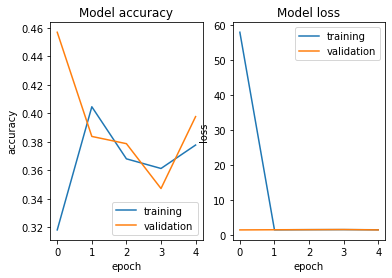

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['training', 'validation'], loc='lower right')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['training', 'validation'], loc='upper right')

#### Evaluating Test set

In [31]:
# Write your code here
model_mnist.evaluate(
    x=x_test_1,
    y=y_test_1,
    batch_size=64
)

157/157 [==============================] - 0s 2ms/step - loss: 1.5630 - accuracy: 0.3989


[1.563016653060913, 0.39890000224113464]

#### Predicting Some samples from Test set

In [32]:
# Write your code here
import random
for i in range(10):
    index = random.randint(0, 10000)
    y_predicted = model_mnist.predict(np.array([x_test_1[index]]))
    print(f"y_predicted : {np.argmax(y_predicted)} , y_true : {np.argmax(y_test_1[index])}")

1/1 [==============================] - 0s 65ms/step
y_predicted : 3 , y_true : 5
1/1 [==============================] - 0s 16ms/step
y_predicted : 1 , y_true : 1
1/1 [==============================] - 0s 16ms/step
y_predicted : 3 , y_true : 2
1/1 [==============================] - 0s 12ms/step
y_predicted : 3 , y_true : 0
1/1 [==============================] - 0s 16ms/step
y_predicted : 7 , y_true : 7
1/1 [==============================] - 0s 15ms/step
y_predicted : 0 , y_true : 0
1/1 [==============================] - 0s 15ms/step
y_predicted : 3 , y_true : 9
1/1 [==============================] - 0s 14ms/step
y_predicted : 0 , y_true : 0
1/1 [==============================] - 0s 13ms/step
y_predicted : 3 , y_true : 4
1/1 [==============================] - 0s 12ms/step
y_predicted : 3 , y_true : 4


### FER-2013

In [49]:
# Write your code here
model_fer = model_factory(
    input_shape=(48, 48, 1),
    num_classes=7
)

# Write your code here
model_fer.compile(
    loss=loss,
    optimizer=sgd_optimizer,
    metrics=['accuracy'],
)

# Write your code here
history = model_fer.fit(
    x=train_set,
    epochs=5,
    validation_data=train_set,
)

Epoch 1/5
449/449 [==============================] - 144s 321ms/step - loss: 1.8029 - accuracy: 0.2631 - val_loss: 1.7614 - val_accuracy: 0.2939
Epoch 2/5
449/449 [==============================] - 136s 303ms/step - loss: 1.7583 - accuracy: 0.2925 - val_loss: 1.7456 - val_accuracy: 0.3059
Epoch 3/5
449/449 [==============================] - 131s 293ms/step - loss: 1.7382 - accuracy: 0.3056 - val_loss: 1.7230 - val_accuracy: 0.3217
Epoch 4/5
449/449 [==============================] - 135s 301ms/step - loss: 1.7260 - accuracy: 0.3165 - val_loss: 1.7126 - val_accuracy: 0.3214
Epoch 5/5
449/449 [==============================] - 141s 314ms/step - loss: 1.7159 - accuracy: 0.3205 - val_loss: 1.7054 - val_accuracy: 0.3279


#### Plotting model Loss and Accuracy on train and validation sets per epoch

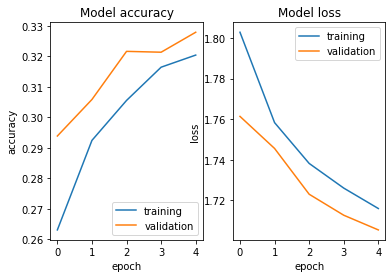

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['training', 'validation'], loc='lower right')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['training', 'validation'], loc='upper right')

#### Evaluating Test set

In [51]:
model_fer.evaluate(
    x=test_set,
)

113/113 [==============================] - 16s 138ms/step - loss: 1.6787 - accuracy: 0.3550


[1.6786696910858154, 0.35497352480888367]

#### Predicting Some samples from Test set

113/113 [==============================] - 14s 127ms/step


Text(0.5, 1.0, 'label: neutral \n actual: happy')

<Figure size 432x288 with 0 Axes>

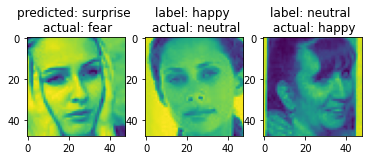

In [53]:
prediction = model_fer.predict(test_set)
# convert prediction to labels
labels = prediction.argmax(axis=-1)

# labels list
label_list = list(test_set.class_indices.keys())

plt.figure()
f, axarr = plt.subplots(1,3) 

# use the created array to output your multiple images.
axarr[0].imshow(np.squeeze(test_set[0][0][5]))
label_1 = label_list[test_set[0][1][5].argmax(axis=-1)]
axarr[1].imshow(np.squeeze(test_set[0][0][29]))
label_2 = label_list[test_set[0][1][29].argmax(axis=-1)]
axarr[2].imshow(np.squeeze(test_set[0][0][10]))
label_3 = label_list[test_set[0][1][10].argmax(axis=-1)]

# Show predicted label for each image
axarr[0].set_title(f'predicted: {label_list[labels[5]]} \n actual: {label_1}')
axarr[1].set_title(f'label: {label_list[labels[29]]} \n actual: {label_2}')
axarr[2].set_title(f'label: {label_list[labels[10]]} \n actual: {label_3}')